## GANs

Neste exercício aprenderemos a desenvolver uma GAN simples utilizando o framework [TF-GAN](https://github.com/tensorflow/gan).

Para isto, utilizaremos o dataset [MNIST](http://yann.lecun.com/exdb/mnist/) para que nossa rede seja capaz de gerar dígitos escritos artificiais.

O Primeiro passo é visualizar como nossa base de treinamento se parece.

Inicie rodando ```pip install tensorflow_gan``` no seu ambiente conda.

In [1]:
import tensorflow as tf
import tensorflow_gan as tfgan
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
#Fazer Gan na mao

<class 'numpy.ndarray'> [4 1 0 ... 6 1 5]
<class 'numpy.ndarray'> (60000, 28, 28, 1)


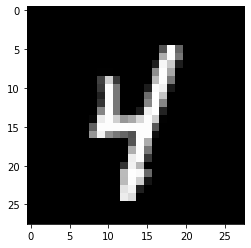

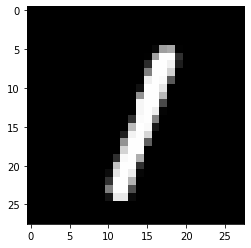

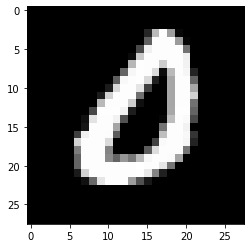

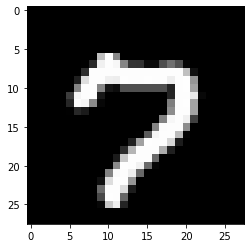

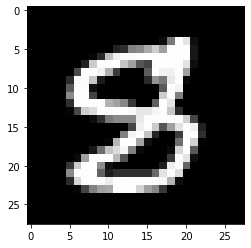

<Figure size 432x288 with 0 Axes>

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='train', 
    batch_size=-1, 
    as_supervised=True,
))
print(type(label),label)
print(type(image), image.shape)
plt.imshow(image[0,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[1,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[2,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[3,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[4,:,:,0],cmap="gray")
plt.figure()
train_image = image
train_labels = label

<class 'numpy.ndarray'> (10000, 28, 28, 1)


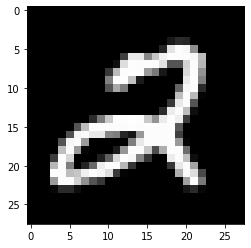

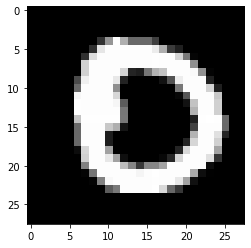

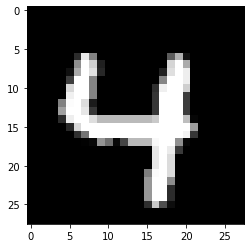

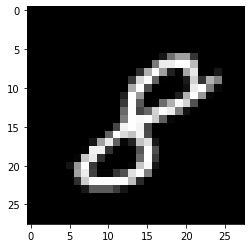

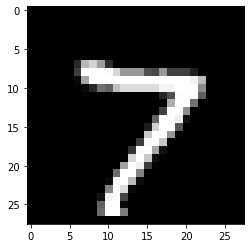

<Figure size 432x288 with 0 Axes>

In [3]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test', 
    batch_size=-1, 
    as_supervised=True,
))

print(type(image), image.shape)
plt.imshow(image[0,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[1,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[2,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[3,:,:,0],cmap="gray")
plt.figure()
plt.imshow(image[4,:,:,0],cmap="gray")
plt.figure()
test_image = image

In [4]:
train_dataset = (train_image.reshape((len(train_image),28,28))- 127.5) / 127.5
test_dataset = (test_image.reshape((len(test_image),28,28))- 127.5) / 127.5



<Figure size 432x288 with 0 Axes>

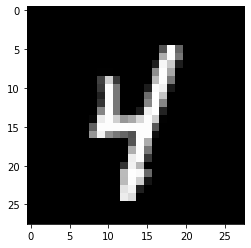

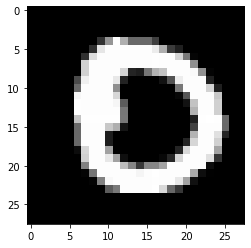

<Figure size 432x288 with 0 Axes>

In [5]:
plt.imshow(train_dataset[0,:,:],cmap="gray")
plt.figure()
plt.imshow(test_dataset[1,:,:],cmap="gray")
plt.figure()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, Conv2D, BatchNormalization,Reshape, Activation, Dense, Flatten, MaxPooling2D

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

embedding_dim = 16
def _batch_norm(inputs, is_training):
  return tf.layers.batch_normalization(
      inputs, momentum=0.999, epsilon=0.001, training=is_training)

#Generator
def unconditional_generator(noise,  weight_decay=2.5e-5):
    """Generator to produce unconditional MNIST images."""
    model = Sequential()
    model.add(Dense(input_dim=64, units=512))
    model.add(Activation('relu'))
    
    model.add(Dense(64*7*7))
    model.add(BatchNormalization())
    
    model.add(Activation('relu'))
    model.add(Reshape((7, 7, 64), input_shape=(64*7*7,))) # 7x7 image
    
    model.add(UpSampling2D(size=(2, 2))) # 14x14 image
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('relu'))
    
    model.add(UpSampling2D(size=(2, 2))) # 28x28 image
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('relu'))
    
    
    return model

def unconditional_discriminator(img, unused_conditioning, weight_decay=2.5e-5):
    model = Sequential()
    
    model.add(Conv2D(32,(5, 5),padding='same',input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (5, 5)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    
    model.add(Dense(512))
    
    model.add(Activation('relu'))
    
    model.add(Dense(1))
 
    return model

#Discriminator

In [7]:
generator_lr = 0.001 #@param
discriminator_lr = 0.0002 #@param

def gen_opt():
  gstep = tf.train.get_or_create_global_step()
  base_lr = generator_lr
  # Halve the learning rate at 1000 steps.
  lr = tf.cond(gstep < 1000, lambda: base_lr, lambda: base_lr / 2.0)
  return tf.keras.optimizers.Adam(lr)

In [8]:
import tensorflow_gan as tfgan
import tensorflow as tf
gan_estimator = tfgan.estimator.GANEstimator(     
        generator_fn=unconditional_generator,
        discriminator_fn=unconditional_discriminator,        
        generator_loss_fn=tfgan.losses.modified_generator_loss,
        discriminator_loss_fn=tfgan.losses.modified_discriminator_loss,        
        generator_optimizer=tf.keras.optimizers.Adam(0.0002, 0.5),
        discriminator_optimizer=tf.keras.optimizers.Adam(0.0002, 0.5),
        add_summaries=tfgan.estimator.SummaryType.IMAGES)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf4mj6od5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf4mj6od5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
train_dataset.shape

(60000, 28, 28)

In [10]:
def input_fn():
    return train_dataset
gan_estimator.train(input_fn, max_steps=next_step)

NameError: name 'next_step' is not defined

In [ ]:
#Here
def input_fn():
    return tf.convert_to_tensor(train_dataset)

import time
steps_per_eval = 500 #@param
max_train_steps = 5000 #@param
batches_for_eval_metrics = 100 #@param

# Used to track metrics.
steps = []
real_logits, fake_logits = [], []
real_mnist_scores, mnist_scores, frechet_distances = [], [], []

cur_step = 0
start_time = time.time()
while cur_step < max_train_steps:
  next_step = min(cur_step + steps_per_eval, max_train_steps)

  start = time.time()
  gan_estimator.train(input_fn, max_steps=next_step)
  steps_taken = next_step - cur_step
  time_taken = time.time() - start
  print('Time since start: %.2f min' % ((time.time() - start_time) / 60.0))
  print('Trained from step %i to %i in %.2f steps / sec' % (
      cur_step, next_step, steps_taken / time_taken))
  cur_step = next_step
  
  # Calculate some metrics.
  metrics = gan_estimator.evaluate(input_fn, steps=batches_for_eval_metrics)
  steps.append(cur_step)
  real_logits.append(metrics['real_data_logits'])
  fake_logits.append(metrics['gen_data_logits'])
  real_mnist_scores.append(metrics['real_mnist_score'])
  mnist_scores.append(metrics['mnist_score'])
  frechet_distances.append(metrics['frechet_distance'])
  print('Average discriminator output on Real: %.2f  Fake: %.2f' % (
      real_logits[-1], fake_logits[-1]))
  print('Inception Score: %.2f / %.2f  Frechet Distance: %.2f' % (
      mnist_scores[-1], real_mnist_scores[-1], frechet_distances[-1]))
  
  # Vizualize some images.
  iterator = gan_estimator.predict(
      input_fn, hooks=[tf.train.StopAtStepHook(num_steps=21)])
  try:
    imgs = np.array([next(iterator) for _ in range(20)])
  except StopIteration:
    pass
  tiled = tfgan.eval.python_image_grid(imgs, grid_shape=(2, 10))
  plt.axis('off')
  plt.imshow(np.squeeze(tiled))
  plt.show()
  
  
# Plot the metrics vs step.
plt.title('MNIST Frechet distance per step')
plt.plot(steps, frechet_distances)
plt.figure()
plt.title('MNIST Score per step')
plt.plot(steps, mnist_scores)
plt.plot(steps, real_mnist_scores)
plt.show()

In [43]:

def gan_generator_model(dim_random):
    model = Sequential()
    model.add(Dense(units=512, input_dim=dim_random, activation='relu'))
    #model.add(Activation('relu'))
    
    #model.add(Dense(64*7*7))
    #model.add(BatchNormalization())
    
    #model.add(Activation('relu'))
    #model.add(Reshape((7, 7, 64), input_shape=(64*7*7,))) # 7x7 image
    
    #model.add(UpSampling2D(size=(2, 2))) # 14x14 image
    #model.add(Conv2D(64, (5, 5), padding='same'))
    #model.add(Activation('relu'))
    
    #model.add(UpSampling2D(size=(2, 2))) # 28x28 image
    #model.add(Conv2D(1, (5, 5), padding='same'))
    #model.add(Activation('relu'))
    model.add(Dense(28*28))
    model.add(Reshape((28, 28, 1)))
    model.add(Activation('relu'))
    return model

def gan_discriminator_model():
    model = Sequential()
    #model.add(Conv2D(32,(5, 5),padding='same',input_shape=(28, 28, 1)))
    #model.add(Activation('relu'))
    
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Conv2D(64, (5, 5)))
    #model.add(Activation('relu'))
    
    #model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten(input_shape=(28,28,1)))
    
    model.add(Dense(512, activation='relu'))
    
    #model.add(Activation('relu'))
    
    model.add(Dense(1, activation='sigmoid'))
 
    return model




In [44]:
from tensorflow.keras.optimizers import Adam, RMSprop

def generator_cost_function(y_actual, y_predicted):
        n_examples = y_actual.shape[0]
        #batch = tf.convert_to_tensor(np.zeros((n_examples*2, 28, 28, 1)), dtype=tf.float32)
        batch = tf.concat([y_actual, y_predicted], axis=0)
        #batch[n_examples:, :, :, 0] = y_predicted
        #Designa labels inversas para calcular a loss(o gerador tenta fazer o discriminador errar)
        labels = np.zeros(batch.shape[0])
        labels[n_examples:] = 1. #1 é a label dos exemplos reais para o discriminador e para os falsos no gerador
        prediction = gan_discriminator.predict(batch)
        bce = tf.keras.losses.BinaryCrossentropy(tf.convert_to_tensor(labels),prediction)
        return bce
    
    

dim_random_vector = 64
gan_generator = gan_generator_model(dim_random_vector)
gan_generator.compile(optimizer=Adam(0.0002), loss=generator_cost_function, metrics=['accuracy'])
gan_generator.summary()

gan_discriminator = gan_discriminator_model()
gan_discriminator.compile(optimizer=Adam(0.0002), loss='binary_crossentropy', metrics=['accuracy'])
gan_discriminator.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_37 (Dense)             (None, 784)               402192    
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 1)         0         
Total params: 435,472
Trainable params: 435,472
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
________________________

In [55]:
batch_size = 64
repet = 1000
epochs = 100


for i in range(repet):
       
    
    gan_generator.fit(np.random.rand(len(train_dataset),dim_random_vector),train_dataset, epochs = epochs,  verbose=2)
    
    batch = np.zeros((len(train_dataset)*2,28,28,1))
    batch[:len(train_dataset), :, :, :] =train_dataset
    batch[len(train_dataset):, :, :, :] = gan_generator.predict(np.random.rand(len(train_dataset),dim_random_vector))
    labels = np.zeros(len(train_dataset)*2)
    labels[:len(train_dataset)] = 1.
    gan_discriminator.fit(batch, labels, epochs= epochs, verbose=2)



AttributeError: 'method' object has no attribute 'autograph_info__'